In [1]:
# Importa as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv('data.csv')

# Tratamento dos dados

In [2]:
# Tratamento dos dados
colunas_a_remover = ['id', 'Unnamed: 32']
colunas_existentes = [col for col in colunas_a_remover if col in df.columns]
df.drop(columns=colunas_existentes, inplace=True)
df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1})
df.head()

C:\Users\felip\AppData\Local\Temp\ipykernel_18072\1322615606.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1})


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Feature visualization

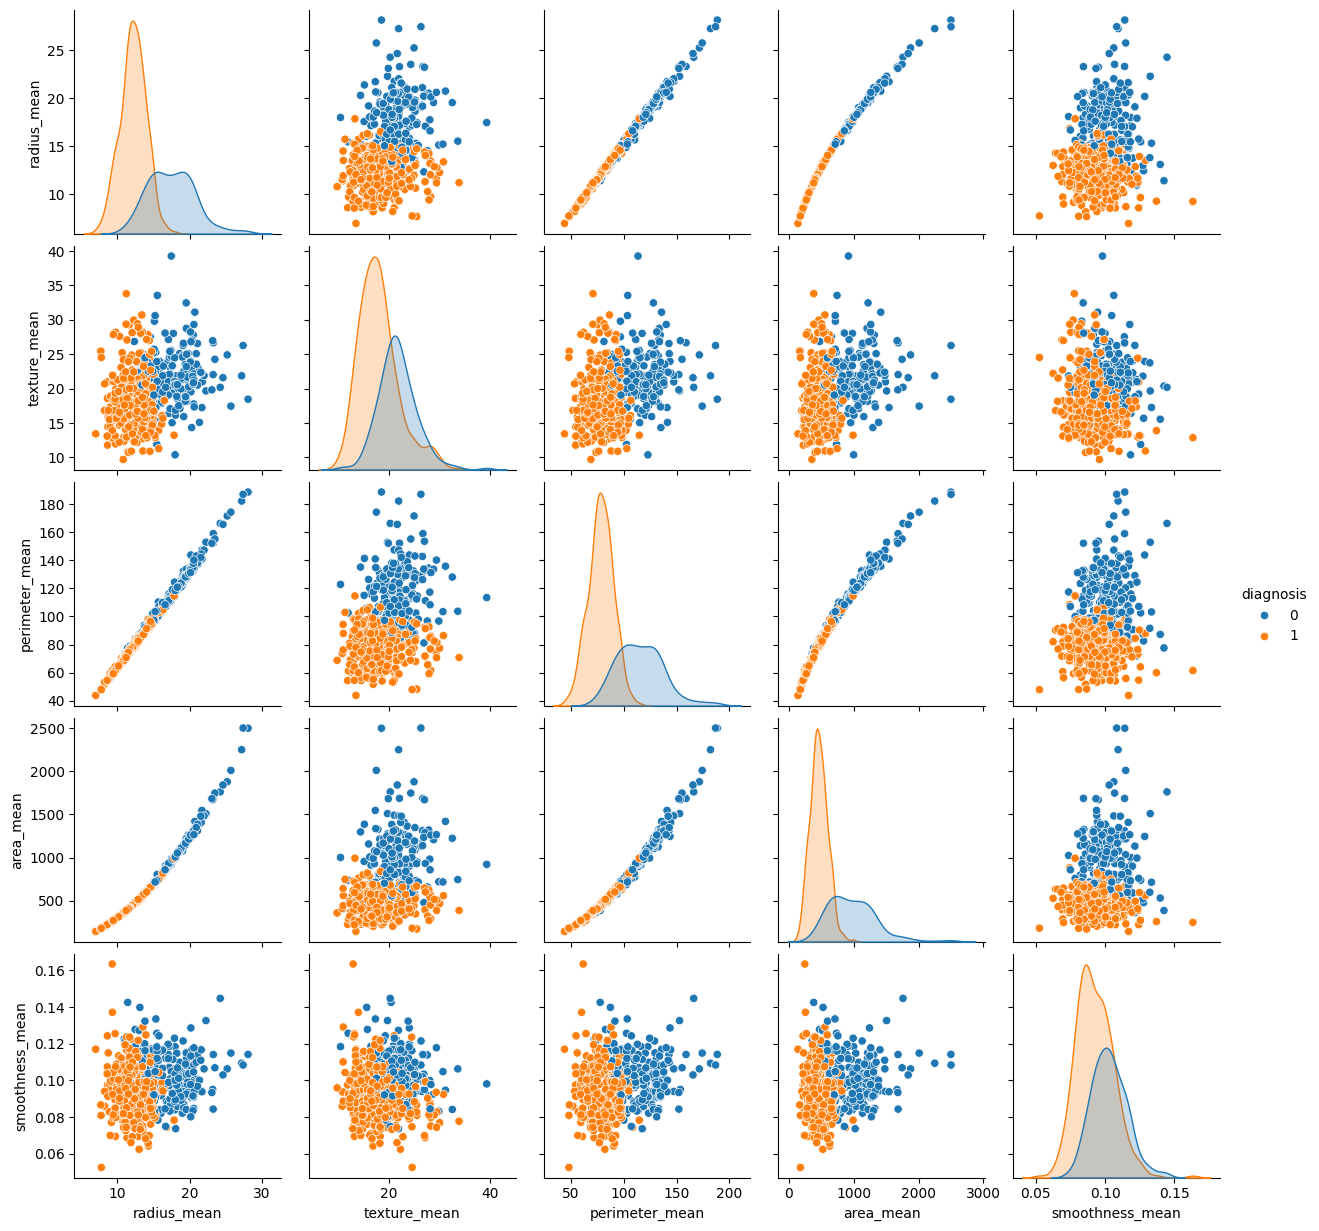

In [3]:
# Cria gráficos de dispersão para visualizar a relação entre as variáveis
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])

(569, 2)


<Axes: >

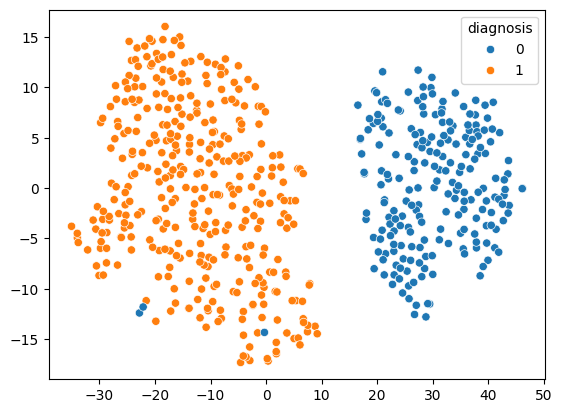

In [4]:
# Normaliza os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Importa TSNE
from sklearn.manifold import TSNE

# Cria o modelo
tsne = TSNE(n_components=2, random_state=42)
TSNE_components = tsne.fit_transform(df_scaled)
print(TSNE_components.shape)

sns.scatterplot(x=TSNE_components[:,0], y=TSNE_components[:,1], hue=df['diagnosis'])

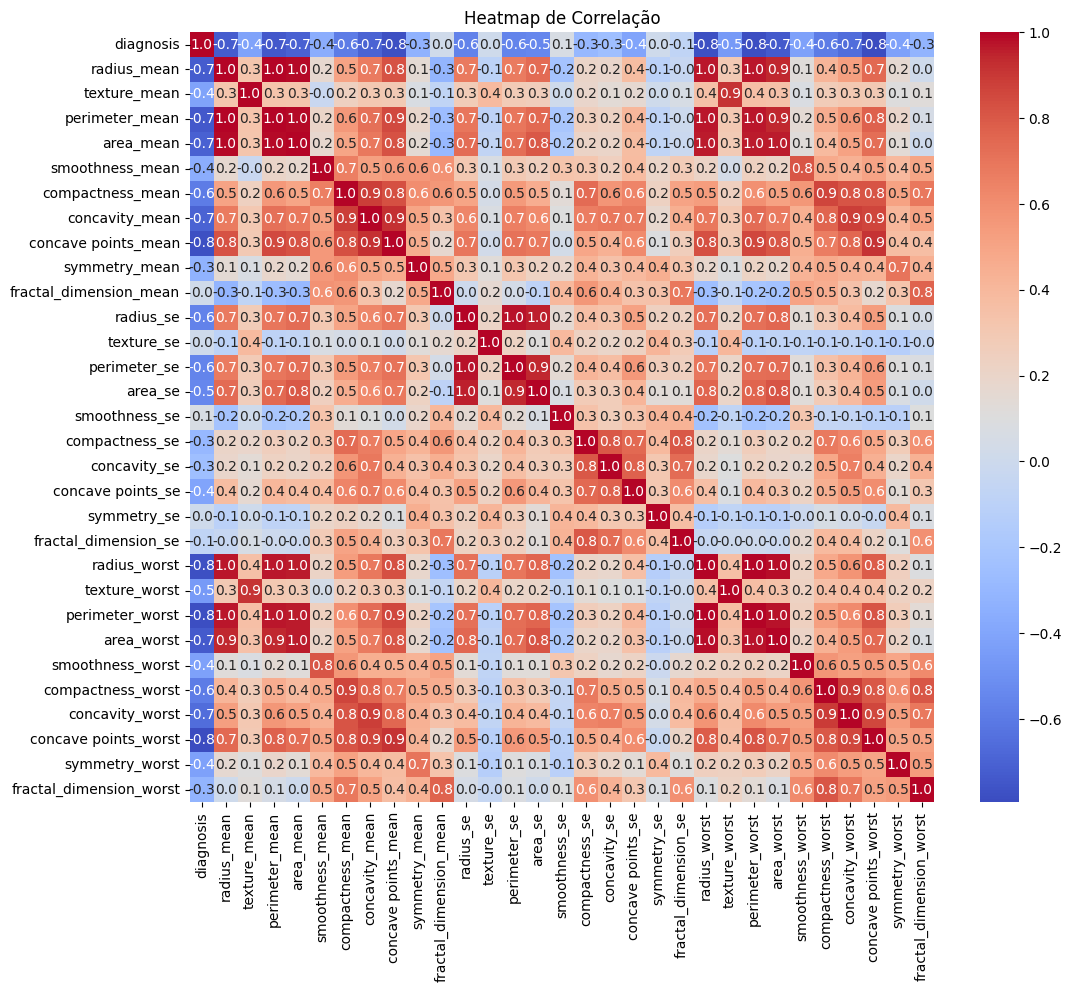

In [5]:
# Gera uma matriz de correlação entre as variáveis do dataframe
corr_matrix = df.corr()

# Plota um heatmap da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.show()

# Feature Selection

In [6]:
# tirando as features que tem alta correlação
corr_matrix = df.corr().abs()

# matriz triangular apenas com a parte superior (correlações duplicadas não são consideradas)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.9
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= threshold)]
df_reduced = df.drop(columns=to_drop)

print("Features removidas:", to_drop)
print("Novo DataFrame após a remoção:")
df_reduced.head()

Features removidas: ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']
Novo DataFrame após a remoção:


,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,0,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,0,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,0,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,0,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [7]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = df.drop(columns=["diagnosis"]) # features
y = df["diagnosis"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

# Normaliza
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Cria o modelo
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)

rfe.fit(x_train_scaled, y_train)

print('Ranking das features:')
print(dict(zip(x.columns, rfe.ranking_))) # Quanto maior, menos importante

# Printa as features que não foram eliminadas
selected_features = x.columns[rfe.support_]
print('\nAs features selecionadas são:')
print(f'{selected_features}')

# Printa acurácia
acc = accuracy_score(y_test, rfe.predict(x_test_scaled))
print('\nAcurácia do modelo com as features selecionadas:')
print(f'{acc:.2f}')


Ranking das features:
{'radius_mean': 8, 'texture_mean': 14, 'perimeter_mean': 9, 'area_mean': 4, 'smoothness_mean': 17, 'compactness_mean': 13, 'concavity_mean': 1, 'concave points_mean': 1, 'symmetry_mean': 21, 'fractal_dimension_mean': 2, 'radius_se': 3, 'texture_se': 1, 'perimeter_se': 12, 'area_se': 1, 'smoothness_se': 11, 'compactness_se': 6, 'concavity_se': 19, 'concave points_se': 20, 'symmetry_se': 18, 'fractal_dimension_se': 10, 'radius_worst': 1, 'texture_worst': 1, 'perimeter_worst': 1, 'area_worst': 1, 'smoothness_worst': 1, 'compactness_worst': 16, 'concavity_worst': 7, 'concave points_worst': 1, 'symmetry_worst': 5, 'fractal_dimension_worst': 15}

As features selecionadas são:
Index(['concavity_mean', 'concave points_mean', 'texture_se', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'concave points_worst'],
      dtype='object')

Acurácia do modelo com as features selecionadas:
0.97


# Feature Extraction

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 
y_class_count = dict(y_train.value_counts())
y_samples_sum = sum(y_class_count.values())

print("Ocorrência de Tumores Benignos: {0:.2f}".format(y_class_count.get(1, 0) / y_samples_sum))
print("Ocorrência de Tumores Malignos: {0:.2f}".format(y_class_count.get(0, 0) / y_samples_sum))

Ocorrência de Tumores Benignos: 0.63
Ocorrência de Tumores Malignos: 0.37


In [9]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_scaled)

# Variância de cada componente
print('Variância de cada componente:')
print(pca.explained_variance_ratio_.round(3))

# Soma cumulativa da variância
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print('\nVariância acumulada:')
print(cumulative_variance.round(3))

Variância de cada componente:
[0.437 0.196 0.092 0.067 0.055 0.041 0.022 0.016 0.014 0.012 0.01  0.009
 0.007 0.005 0.003 0.003 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001
 0.001 0.    0.    0.    0.    0.   ]

Variância acumulada:
[0.437 0.633 0.725 0.792 0.847 0.887 0.91  0.926 0.94  0.952 0.962 0.971
 0.978 0.983 0.987 0.989 0.991 0.993 0.995 0.996 0.997 0.998 0.998 0.999
 0.999 1.    1.    1.    1.    1.   ]


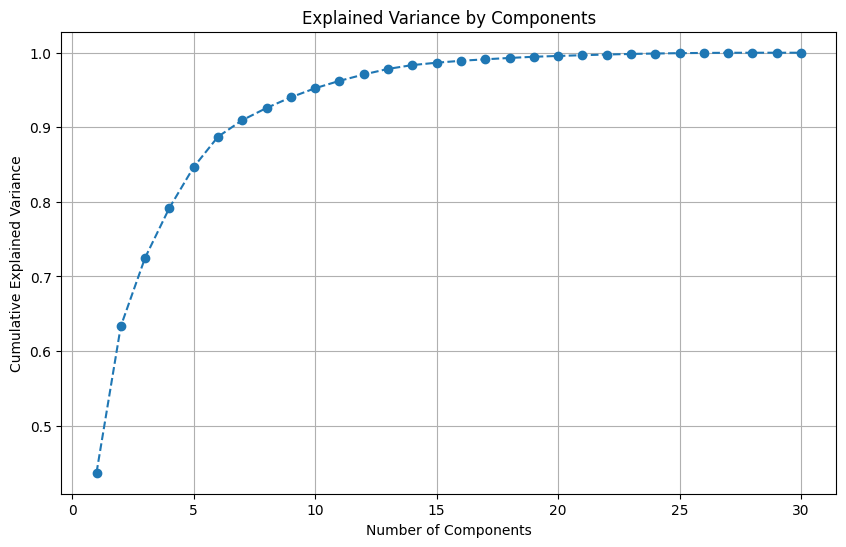

In [10]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

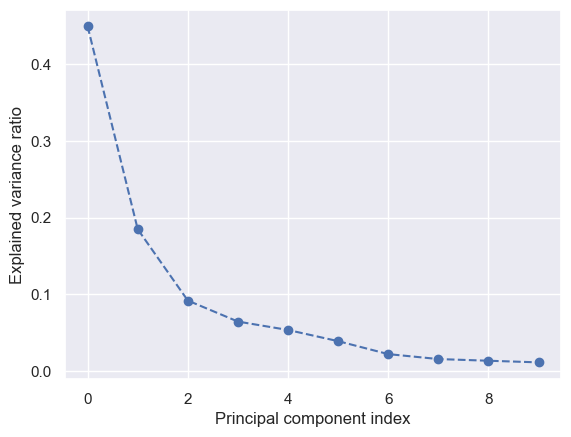

In [11]:
# Pipeline a scaler and pca selecting 10 components
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(df_scaled)

# Plot the explained variance ratio
sns.set_theme('notebook')
plt.plot(pipe['reducer'].explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [12]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=6)  
X_pca = pca.fit_transform(x_scaled)

num_components = min(6, X_pca.shape[1]) 
df_pca = pd.DataFrame(data=X_pca[:, :num_components], columns=[f'Principal Component {i+1}' for i in range(num_components)])

print("\nDataFrame após PCA:")
print(df_pca)


DataFrame após PCA:
     Principal Component 1  Principal Component 2  Principal Component 3  \
0                 9.192837               1.948583              -1.123166   
1                 2.387802              -3.768172              -0.529293   
2                 5.733896              -1.075174              -0.551748   
3                 7.122953              10.275589              -3.232790   
4                 3.935302              -1.948072               1.389767   
..                     ...                    ...                    ...   
564               6.439315              -3.576817               2.459487   
565               3.793382              -3.584048               2.088476   
566               1.256179              -1.902297               0.562731   
567              10.374794               1.672010              -1.877029   
568              -5.475243              -0.670637               1.490443   

     Principal Component 4  Principal Component 5  Principal Compo